In [3]:
from plantcv import plantcv as pcv
from pathlib import Path

from leafy.loader import ImageLoader

data_folder = Path("./images")
loader = ImageLoader(data_folder)    

# Colors

In [246]:
from torchvision.transforms.functional import to_tensor, to_pil_image
from leafy.types import rgb_image, mask

import random
from PIL import Image

index = random.randint(0, len(loader) - 1)
im, y = loader[index]
# im_path = loader.image_files[index]
# img, path, filename = pcv.readimage(filename=str(im_path))

#Threshold your image by choosing points in the plot that will separate the green plant pixels from everything else. 
# It will draw a line between your two points and take every pixel "above" (if set to true). Do you get all of the plant?

# thresh1 = pcv.threshold.dual_channels(rgb_img = img, x_channel = "a", y_channel = "b", points = [(80,80),(125,140)], above=True)


# Image.fromarray(thresh1)

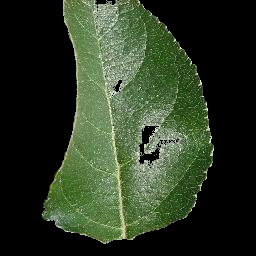

In [256]:
import numpy as np
from torch import Tensor
import torch

def get_mask(im: rgb_image) -> mask:
    im_last = im.transpose(0, 1).transpose(1, 2)
    thresh1 = pcv.threshold.dual_channels(rgb_img = (im_last * 255).numpy().astype(np.uint8), x_channel = "a", y_channel = "b", points = [(80,80),(125,140)], above=True)
    return Tensor(thresh1).to(torch.float32) / 255.

mask = get_mask(im)

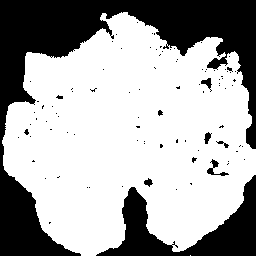